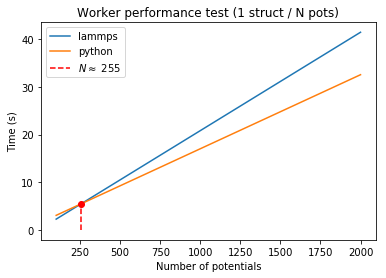

In [4]:
import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt("2000_timing_tests.dat")

x = data[:,0]
lammpsy = data[:,1]
pythony = data[:,2]

A = np.ones((len(data), 2))
A[:,1] = x.copy()

lammpsb, lammpsm = np.linalg.lstsq(A, lammpsy)[0]
pythonb, pythonm = np.linalg.lstsq(A, pythony)[0]

intersection = (pythonb - lammpsb)/(lammpsm - pythonm)

lammpsf = lambda x: lammpsb + lammpsm*x
pythonf = lambda x: pythonb + pythonm*x

xplotting = np.linspace(data[0,0], data[len(data)-1,0], num=1000)
lammpsfit = np.array(list(map(lammpsf, xplotting)))
pythonfit = np.array(list(map(pythonf, xplotting)))

diff = lammpsfit - pythonfit

plt.figure()
plt.title("Worker performance test (1 struct / N pots)")
plt.plot(xplotting, lammpsfit, '-', label='lammps')
plt.plot(xplotting, pythonfit, '-', label='python')
plt.plot((intersection, intersection), (0, lammpsf(intersection)), '--r',
         label=r'$N \approx$ {0}'.format(int(intersection)))
plt.plot(intersection, lammpsf(intersection), 'ro')
plt.xlabel("Number of potentials")
plt.ylabel("Time (s)")
plt.legend()
plt.show()

#plt.figure()
#plt.title("Worker performance test (1 struct / N pots)")
#plt.plot(xplotting, diff)
#plt.show()

In [115]:
# Plotting gradient runtimes
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

e_speedups = defaultdict(list)
f_speedups = defaultdict(list)

with open("../../grad_time_long2.dat", 'r') as file:
    lines = file.readlines()
    
    for line in lines[1:]:
        if 'speedup' not in line:
            line = line.split(" ")

            e_speedups[line[0]].append(float(line[1]))
            f_speedups[line[0]].append(float(line[4]))

e_avg_speedups = {}
f_avg_speedups = {}

e_stdv = {}
f_stdv = {}

for key in e_speedups.keys():
    e_avg_speedups[key] = np.average(e_speedups[key])
    f_avg_speedups[key] = np.average(f_speedups[key])
    
    e_stdv[key] = np.std(e_speedups[key])
    f_stdv[key] = np.std(f_speedups[key])
    
names = np.array(list(e_avg_speedups.keys()))

e_avg_speedups = np.array(list(e_avg_speedups.values()))
f_avg_speedups = np.array(list(f_avg_speedups.values()))

e_stdv = np.array(list(e_stdv.values()))
f_stdv = np.array(list(f_stdv.values()))

# e_indices = np.argsort(e_avg_speedups)
f_indices = np.argsort(f_avg_speedups)

e_avg_speedups = e_avg_speedups[f_indices]
f_avg_speedups = f_avg_speedups[f_indices]

e_stdv = e_stdv[f_indices]
f_stdv = e_stdv[f_indices]

names = names[f_indices]

print(e_speedups['bulk_vac_ortho_mixed'])

[11.327226033960674, 14.05786365343256, 33.69642175936522, 9.263521941263182, 6.785684079952637, 12.097571205246501, 11.156494048070362, 9.729474563346526, 11.465910826080318, 11.191001373836055]


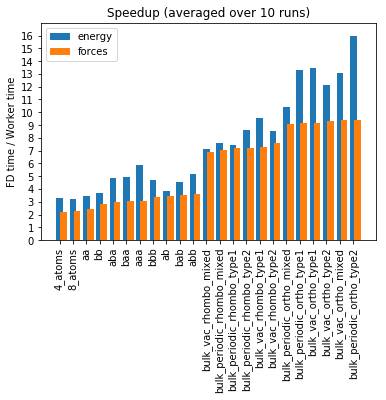

In [116]:
fig = plt.figure()
ax = fig.add_subplot(111)

xpos = np.arange(len(names))
width = 0.5

rects1 = ax.bar(xpos, e_avg_speedups, align = 'center', label='energy', width=width)#, yerr=e_stdv)
rects1 = ax.bar(xpos+0.3, f_avg_speedups, align = 'center', label='forces', width=width)#, yerr=f_stdv)

ax.set_xticklabels(names, rotation=90)
plt.xticks(np.arange(len(names)))
plt.title("Speedup (averaged over 10 runs)")
plt.ylabel("FD time / Worker time")
plt.ylim([0,17])
plt.yticks(np.arange(17))
plt.legend()
plt.savefig('grad_speedup.png')
plt.show()

In [131]:
# Plotting gradient accuracies
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

e_absolute_errors = defaultdict(list)
f_absolute_errors = defaultdict(list)

with open("../../src/grad_accuracy_normed_redo.dat", 'r') as file:
    lines = file.readlines()
    
    for line in lines[1:]:
        if 'name' not in line:
            line = line.split(" ")

            e_absolute_errors[line[0]].append(float(line[1]))
            f_absolute_errors[line[0]].append(float(line[2]))

avg_e_absolute_errors = {}
avg_f_absolute_errors = {}

for key in e_absolute_errors.keys():
    avg_e_absolute_errors[key] = np.average(e_absolute_errors[key])
    avg_f_absolute_errors[key] = np.average(f_absolute_errors[key])

names = np.array(list(e_absolute_errors.keys()))

avg_e_absolute_errors = np.array(list(avg_e_absolute_errors.values()))
avg_f_absolute_errors = np.array(list(avg_f_absolute_errors.values()))

# e_indices = np.argsort(avg_e_absolute_errors)
# f_indices = np.argsort(avg_f_absolute_errors)

# avg_e_absolute_errors = avg_e_absolute_errors[f_indices]
# avg_f_absolute_errors = avg_f_absolute_errors[f_indices]

# names = names[f_indices]

print(np.log10(avg_e_absolute_errors))
print(avg_f_absolute_errors)
print(np.log10(avg_f_absolute_errors))

[-7.48432323 -7.32275488 -7.8713026  -7.53293492 -7.8713026  -7.99523033
 -7.35200599 -7.46151473 -7.91632343 -7.53726832 -7.56604558 -7.68936495
 -7.82237018 -7.5495261  -7.35200599 -7.9118902  -7.82237018 -7.5495261
 -7.68936495 -7.48432323 -7.87644406 -7.44869722 -7.99523033]
[5.52189259e-08 3.71973722e-08 3.07495713e-06 7.28931983e-08
 3.07495713e-06 3.28499387e-06 2.81133153e-07 5.93983018e-08
 3.11577244e-08 1.16567451e-07 7.35362087e-08 8.66529237e-07
 1.03159147e-07 1.32998586e-07 2.81133153e-07 1.69240894e-08
 1.03159147e-07 1.32998586e-07 8.66529237e-07 3.72573288e-08
 5.23767144e-07 1.30553984e-08 3.28499387e-06]
[-7.25791205 -7.42948774 -5.51216093 -7.13731299 -5.51216093 -5.48346544
 -6.55108794 -7.22622597 -7.50643427 -6.9334227  -7.13349876 -6.06221678
 -6.98649226 -6.87615298 -6.55108794 -7.77149469 -6.98649226 -6.87615298
 -6.06221678 -7.42878829 -6.28086175 -7.88420987 -5.48346544]


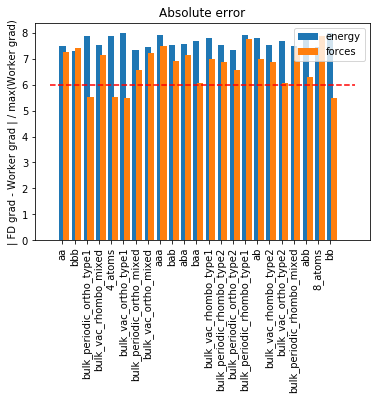

In [129]:
fig = plt.figure()
ax = fig.add_subplot(111)

xpos = np.arange(len(names))
width = 0.5

rects1 = ax.bar(xpos, np.abs(np.log10(avg_e_absolute_errors)), align = 'center', label='energy', width=width)
rects1 = ax.bar(xpos+0.3, np.abs(np.log10(avg_f_absolute_errors)), align = 'center', label='forces', width=width)
ax.plot([-1, len(xpos)+1], [6,6], '--r')

ax.set_xticklabels(names, rotation=90)
plt.xticks(np.arange(len(names)))
plt.title("Absolute error")
plt.ylabel("| FD grad - Worker grad | / max(Worker grad)")
# plt.ylim([0,17])
# plt.yticks(np.arange(17))
plt.legend()
plt.savefig('grad_acc.png')
plt.show()

In [2]:
# Timing tests for Python vs. Numpy vs. Numba

"""
Intended to compare runtimes for various key functions:
    1) Outer products
    2) Indexing
    3) Einsum
"""

import os
import time
import numpy as np
from numba import jit
import matplotlib.pyplot as plt

In [62]:
v1 = v2 = v3 = np.arange(10)

n1 = v1.shape[0]
n2 = v2.shape[0]
n3 = v3.shape[0]

tmp_output = np.zeros((n1, n2))
output = np.zeros((n1*n2, n3))

tmp_output2 = np.zeros(n1*n2)
output2 = np.zeros(n1*n2*n3)

""" Define outer product functions"""

def python_outer(u1, u2, u3, n1, n2, n3, output):

    for i in range(n1):
        u1_i = u1[i]
        for j in range(n2):
            u2_j = u2[j]
            ij = i*j
            for k in range(n3):
                output[ij*k] = u1_i*u2_j*u3[k]

    return output

def numpy_outer(u1, u2, u3, tmp_output, output):
    np.outer(u1, u2, out=tmp_output)
    np.outer(tmp_output, u3, out=output)
    
    return output

def numpy_outer_einsum(u1, u2, u3, tmp_output, output):
    np.einsum('i,j', u1, u2, out=tmp_output)
    np.einsum('i,j', tmp_output.ravel(), u3, out=output)
    
    return output.ravel()

def numpy_outer_tensordot(u1, u2, u3):
    tmp = np.tensordot(u1, u2, axes=0).ravel()
    return np.tensordot(tmp, u3, axes=0).ravel()
    
numba_py_outer = jit(python_outer, nopython=True)
numba_np_outer = jit(numpy_outer, nopython=True)
numba_np_einsum = jit(numpy_outer_einsum)
numba_np_tensordot = jit(numpy_outer_tensordot)

In [63]:
# Native Python
print("Python\t: ", end="")
%timeit python_outer(v1, v2, v3, n1, n2, n3, output2)

# Numpy (using outer)
print("np_out\t: ", end="")
%timeit numpy_outer(v1, v2, v3, tmp_output, output)

# Numpy (using einsum)
print("np_ein\t: ", end="")
%timeit numpy_outer_einsum(v1, v2, v3, tmp_output, output)

# Numpy (using tensordot)
print("np_ten\t: ", end="")
%timeit numpy_outer_tensordot(v1, v2, v3)

# Numba (JIT Python)
numba_py_outer(v1, v2, v3, n1, n2, n3, output2)
print("nb_pyt\t: ", end="")
%timeit numba_py_outer(v1, v2, v3, n1, n2, n3, output2)

# Numba (JIT Numpy outer)
numba_np_outer(v1, v2, v3, tmp_output, output)
print("nb_out\t: ", end="")
%timeit numba_np_outer(v1, v2, v3, tmp_output, output)

# Numba (JIT Numpy einsum)
numba_np_einsum(v1, v2, v3, tmp_output, output)
print("nb_ein\t: ", end="")
%timeit numba_np_einsum(v1, v2, v3, tmp_output, output)

# Numba (JIT Numpy tensordot)
numba_np_tensordot(v1, v2, v3)
print("nb_ten\t: ", end="")
%timeit numba_np_tensordot(v1, v2, v3)

Python	: 337 µs ± 1.36 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
np_out	: 13.7 µs ± 58.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
np_ein	: 12.9 µs ± 39 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
np_ten	: 66.8 µs ± 169 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
nb_pyt	: 2.08 µs ± 10.6 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
nb_out	: 2.69 µs ± 10.3 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
nb_ein	: 19.6 µs ± 111 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
nb_ten	: 75.2 µs ± 129 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [64]:
N = 128
M = 10

# array, indices, and vec for indexing and einsum
A = np.random.random((N, N, M*M*M))
indices = np.arange(0, M*M*M, M // 10)
b = np.arange(M*M*M)

output = np.zeros((N, N, indices.shape[0]))

"""Define indexing functions"""

def python_indexing(A, indices, output):
    for k in range(indices.shape[0]):
        ind = indices[k]
        for i in range(A.shape[0]):
            for j in range(A.shape[1]):
                output[i,j,k] = A[i, j, ind]
                
def numpy_indexing(A, indices):
    return A[:, :, indices]

numba_py_indexing = jit(python_indexing, nopython=True)
numba_np_indexing = jit(numpy_indexing, nopython=True)

In [65]:
print("Python\t: ", end="")
%timeit python_indexing(A, indices, output)

print("Numpy\t: ", end="")
%timeit numpy_indexing(A, indices)

print("nb_pyt\t: ", end="")
numba_py_indexing(A, indices, output)
%timeit numba_py_indexing(A, indices, output)

print("nb_npy\t: ", end="")
numba_np_indexing(A, indices)
%timeit numba_np_indexing(A, indices)

Python	: 5.08 s ± 16.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Numpy	: 172 ms ± 263 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
nb_pyt	: 280 ms ± 1.23 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
nb_npy	: 44.9 ms ± 242 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [93]:
"""Define einsum functions"""

output2 = np.zeros((N, N))

def python_einsum(A, b, output):
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            for z in range(b.shape[0]):
                output[i,j] += b[z]*A[i,j,z]
    return output

def hybrid_einsum(A, b, output):
    for i in range(A.shape[0]):
        for a in range(A.shape[1]):
            output[i,a] = np.sum(A[i,a,:]*b)
    
def numpy_einsum(A, b, output):
    np.einsum('ijk,k->ij', A, b, out=output)
    return output
    
def numpy_einsum_noout(A, b):
    output = np.einsum('ijk,k->ij', A, b)
    return output

nb_py_einsum = jit(python_einsum, nopython=True)
nb_hybrid_einsum = jit(hybrid_einsum, nopython=True)
nb_np_einsum = jit(numpy_einsum)
nb_noout_einsum = jit(numpy_einsum_noout)

In [96]:
# print("Python\t: ", end="")
# %timeit python_einsum(A, b, output2)

print("Hybrid\t: ", end="")
%timeit hybrid_einsum(A, b, output2)

print("np_ein\t: ", end="")
%timeit numpy_einsum(A, b, output2)

print("no_out\t: ", end="")
%timeit numpy_einsum_noout(A, b)

# print("nb_pyt\t: ", end="")
# nb_py_einsum(A, b, output)
# %timeit nb_py_einsum(A, b, output)

print("nb_hyb\t: ", end="")
nb_hybrid_einsum(A, b, output)
%timeit nb_hybrid_einsum(A, b, output)

print("nb_ein\t: ", end="")
nb_np_einsum(A, b, output2)
%timeit nb_np_einsum(A, b, output2)

print("nb_nout\t: ", end="")
nb_noout_einsum(A, b)
%timeit nb_noout_einsum(A, b)

Hybrid	: 186 ms ± 3.87 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
np_ein	: 8.46 ms ± 10.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
no_out	: 8.77 ms ± 441 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
nb_hyb	: 40.4 ms ± 284 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
nb_ein	: 8.59 ms ± 231 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
nb_nout	: 8.64 ms ± 99.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
